[![Abrir no Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/labren/sonda-curadoria/blob/main/01_Analise_Exploratoria_Solarimetricos.ipynb)

# Análise Exploratória de Dados Solarimétricos
Este notebook realiza uma análise exploratória dos dados solarimétricos da rede SONDA.

## Importação das Bibliotecas
- **duckdb**: Banco de dados relacional que permite consultas SQL em arquivos locais
- **matplotlib.pyplot**: Biblioteca para criação de gráficos
- **seaborn**: Biblioteca para visualização de dados estatísticos

In [5]:
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

## Configuração Inicial
Definindo o caminho do arquivo parquet contendo os dados solarimétricos e o nome da tabela.

In [6]:
# Instalar gdown para descargar el archivo de Google Drive
!python -m pip install -q -U gdown

import gdown

url = 'https://drive.google.com/uc?id=1JJ084_fEB3PJoiKrrFCEfxoyyz7u6mU9'
gdown.download(url, 'Solarimetrica.parquet', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1JJ084_fEB3PJoiKrrFCEfxoyyz7u6mU9
From (redirected): https://drive.google.com/uc?id=1JJ084_fEB3PJoiKrrFCEfxoyyz7u6mU9&confirm=t&uuid=55dae497-3171-43b7-80c0-3f1399410878
To: /home/helvecioneto/sonda-curadoria/Solarimetrica.parquet
100%|██████████| 6.15G/6.15G [08:55<00:00, 11.5MB/s]


'Solarimetrica.parquet'

In [6]:
# Configurações para o nome do arquivo e da tabela
ARQUIVO_SOLARIMETRO = './Solarimetrica.parquet'
NOME_DA_TABELA = 'solarimetrica'

## Conexão com o Banco de Dados
Criando uma conexão em memória com o DuckDB.

In [7]:
con = duckdb.connect(database=':memory:')

Importando os dados do arquivo Parquet para uma tabela no DuckDB.

In [8]:
# Cria as tabelas no banco de dados DuckDB a partir dos arquivos Parquet
con.execute(f"""CREATE TABLE IF NOT EXISTS {NOME_DA_TABELA} AS \
            SELECT * FROM read_parquet('{ARQUIVO_SOLARIMETRO}')""")

# Visualização Inicial dos Dados
Exibindo as primeiras 5 linhas da tabela para verificar sua estrutura.

In [9]:
# Exibe as primeiras linhas da tabela
con.execute(f"SELECT * FROM {NOME_DA_TABELA} LIMIT 5").fetch_df()

,acronym,timestamp,year,day,min,glo_avg,glo_std,glo_max,glo_min,dif_avg,...,dir_min,lw_avg,lw_std,lw_max,lw_min,temp_glo,temp_dir,temp_dif,temp_dome,temp_case
0,SLZ,2013-12-25 05:31:00,2013,359,331.0,-1.305,0.000,-1.305,-1.305,-1.292,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1,SLZ,2013-12-25 18:36:00,2013,359,1116.0,493.500,1.790,496.000,490.100,485.400,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2,SLZ,2013-12-26 05:24:00,2013,360,324.0,-1.414,0.165,-1.305,-1.958,-1.292,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,SLZ,2013-12-26 10:34:00,2013,360,634.0,175.400,8.040,190.600,164.100,160.700,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
4,SLZ,2013-12-26 18:18:00,2013,360,1098.0,427.600,3.200,434.300,422.900,405.400,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [13]:
# Faz uma consulta para obter dados da estação BRB para o período de 2018-12-01 a 2019-12-31
query = f"""
SELECT * FROM {NOME_DA_TABELA}
WHERE acronym = 'BRB' AND timestamp >= '2010-01-01' AND timestamp <= '2025-12-31'
"""
# Executa a consulta e armazena o resultado em um DataFrame
estacao_df = con.execute(query).fetch_df()
estacao_df

,acronym,timestamp,year,day,min,glo_avg,glo_std,glo_max,glo_min,dif_avg,...,dir_min,lw_avg,lw_std,lw_max,lw_min,temp_glo,temp_dir,temp_dif,temp_dome,temp_case
0,BRB,2015-11-07 11:06:00,2015,311,666.0,541.100,0.639,542.000,539.400,116.900,...,716.000,367.7,0.218,368.2,367.4,27.06,26.63,26.58,25.74,25.74
1,BRB,2015-11-07 14:55:00,2015,311,895.0,1030.000,0.652,1031.000,1029.000,154.500,...,869.000,394.7,0.501,395.7,394.2,34.35,32.66,33.06,32.17,32.17
2,BRB,2015-11-07 15:48:00,2015,311,948.0,1163.000,1.319,1165.000,1161.000,295.300,...,852.000,414.8,0.357,415.4,414.3,35.87,34.04,34.30,33.99,33.99
3,BRB,2015-11-08 02:21:00,2015,312,141.0,-2.587,0.087,-2.277,-2.628,-2.036,...,0.675,375.1,1.345,377.5,373.2,22.38,21.49,22.46,22.22,22.22
4,BRB,2015-11-08 02:40:00,2015,312,160.0,-2.292,0.048,-2.277,-2.453,-2.036,...,0.225,380.7,0.601,381.5,379.7,24.21,23.32,24.34,24.08,24.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156475,BRB,2011-03-11 17:19:00,2011,70,1039.0,938.000,2.025,941.000,935.000,929.000,...,3.268,366.9,0.912,368.4,364.8,27.69,26.90,28.25,32.44,32.42
3156476,BRB,2011-03-12 04:21:00,2011,71,261.0,-1.063,0.000,-1.063,-1.063,-0.912,...,-0.204,390.6,0.259,391.0,390.1,19.06,18.69,19.09,18.47,18.62
3156477,BRB,2011-03-12 15:18:00,2011,71,918.0,1321.000,164.000,1426.000,702.000,435.000,...,238.800,414.7,2.035,418.2,411.7,27.40,27.30,27.22,30.46,31.22
3156478,BRB,2011-03-12 16:05:00,2011,71,965.0,395.000,77.000,573.700,290.200,313.100,...,0.817,412.2,0.604,413.4,411.0,26.46,26.28,26.51,29.13,29.58


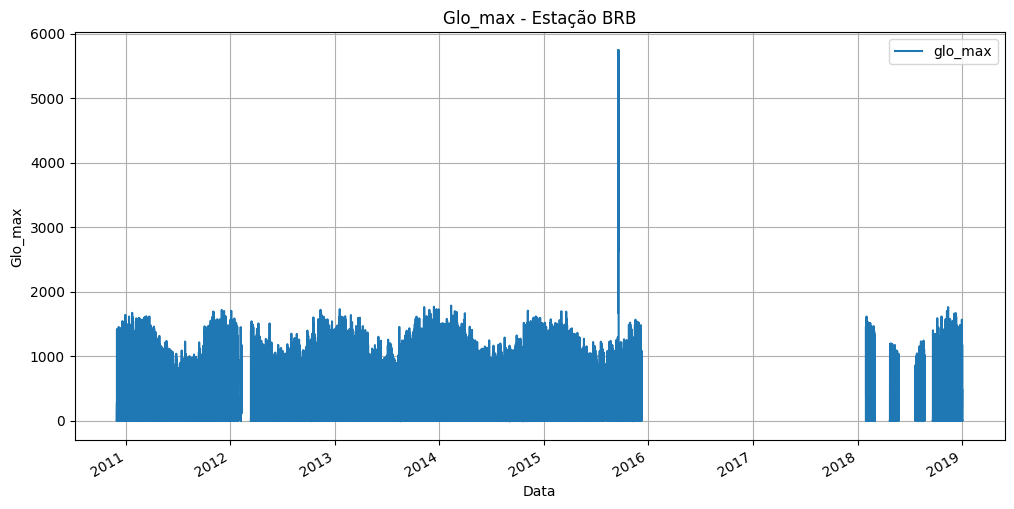

In [14]:
# Seta coluna timestamp como índice e plota variável glo_max
plot_estacao = estacao_df.set_index('timestamp').sort_index()
plot_estacao[['glo_max']].plot(title='Glo_max - Estação BRB', figsize=(12, 6))
plt.xlabel('Data')
plt.ylabel('Glo_max')
plt.grid()
plt.show()

In [15]:
import warnings
warnings.filterwarnings("ignore")

def verifica_temporal(base):
    # Faz um agrupamento por acronym e timestamp para verificar se os dados são temporais, fazendo a contagem de registros por dia
    query = f"""
    SELECT acronym, DATE_TRUNC('year', timestamp) AS data, COUNT(*) AS registros
    FROM {base}
    GROUP BY acronym, data
    ORDER BY data
    """
    return con.execute(query).fetch_df()


def plot_tempora(df, titulo):
    df["year"] = df["data"].dt.year
    df["month"] = df["data"].dt.month
    df = df.dropna(subset=["year"])
    df["year"] = df["year"].astype(int)
    # Reagrupando os dados para evitar duplicatas ao pivotar
    df_grouped = df.groupby(["acronym", "year"])["registros"].sum().reset_index()
    # Criando a matriz pivot corrigida
    heatmap_data = df_grouped.pivot(index="acronym", columns="year", values="registros")
    # Criando a figura
    plt.figure(figsize=(8, max(4, len(heatmap_data) * 0.2)))  # Ajusta dinamicamente o tamanho
    sns.heatmap(heatmap_data, cmap="coolwarm_r", linewidths=0.5, linecolor="gray", 
                cbar_kws={'label': 'Número de Registros'}, annot=False)
    # Ajustando o gráfico
    plt.title(titulo)
    plt.xlabel("Ano")
    plt.ylabel("Estação")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

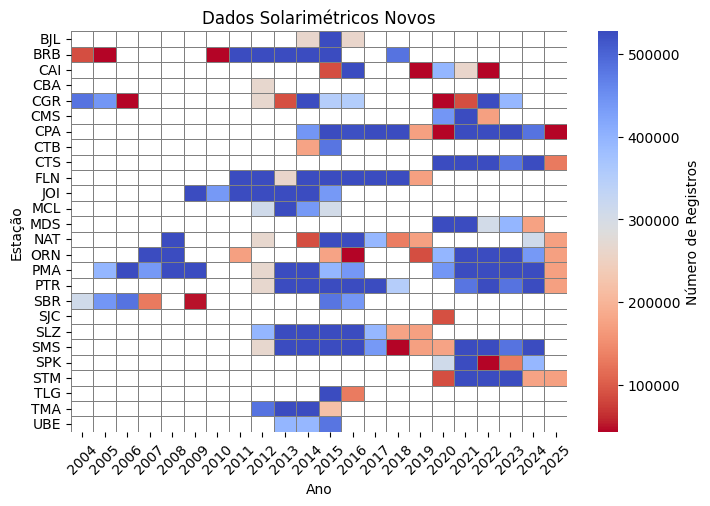

In [17]:
# Plotando os dados temporais de dados disponíveis
temporal_solar = verifica_temporal(NOME_DA_TABELA)
plot_tempora(temporal_solar, 'Dados Solarimétricos Novos')

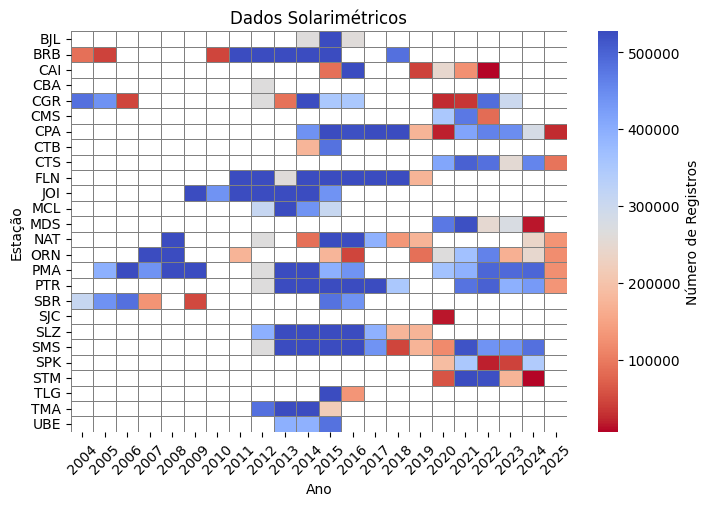

In [12]:
# Plotando os dados temporais de dados disponíveis
temporal_solar = verifica_temporal(NOME_DA_TABELA)
plot_tempora(temporal_solar, 'Dados Solarimétricos')

## Análise dos dados em quarentena

In [13]:
# Download quarentena.csv from Google Drive
url = 'https://drive.google.com/uc?id=1P4h_uGZ8CtZJmkLjemjuYTfkIr5vX3mJ'
gdown.download(url, 'quarentena.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1P4h_uGZ8CtZJmkLjemjuYTfkIr5vX3mJ
To: /home/helvecioneto/sonda-curadoria/quarentena.csv
100%|██████████| 683k/683k [00:00<00:00, 7.34MB/s]


'quarentena.csv'

In [14]:
import pandas as pd

# Lê o arquivo CSV quarentena.csv
quarentena_df = pd.read_csv('quarentena.csv')
quarentena_df

,qid,estacao,tipo,tipo_completo,data_tratamento,status,problema,data_detecao,path
0,3112070185,SPK,SD,Solarimetricos,NaN,quarentena,"último timestamp não é o esperado, esperado: 2...",2025-05-17 19:31:12,output/sonda-quarentena/SPK/Solarimetricos/SPK...
1,3112092973,SPK,SD,Solarimetricos,NaN,quarentena,"último timestamp não é o esperado, esperado: 2...",2025-05-17 19:31:12,output/sonda-quarentena/SPK/Solarimetricos/SPK...
2,3112119030,SPK,SD,Solarimetricos,NaN,quarentena,"último timestamp não é o esperado, esperado: 2...",2025-05-17 19:31:12,output/sonda-quarentena/SPK/Solarimetricos/SPK...
3,3112149026,SPK,SD,Solarimetricos,NaN,quarentena,"último timestamp não é o esperado, esperado: 2...",2025-05-17 19:31:12,output/sonda-quarentena/SPK/Solarimetricos/SPK...
4,3112174858,SPK,SD,Solarimetricos,NaN,quarentena,"último timestamp não é o esperado, esperado: 2...",2025-05-17 19:31:12,output/sonda-quarentena/SPK/Solarimetricos/SPK...
...,...,...,...,...,...,...,...,...,...
2930,4547090144,CAI,SD,Solarimetricos,NaN,quarentena,"número de linhas menor que o esperado, esperad...",2025-05-17 19:45:47,output/sonda-quarentena/CAI/Solarimetricos/CAI...
2931,4547970718,CAI,SD,Solarimetricos,NaN,quarentena,"número de linhas menor que o esperado, esperad...",2025-05-17 19:45:47,output/sonda-quarentena/CAI/Solarimetricos/CAI...
2932,4549029314,CAI,SD,Solarimetricos,NaN,quarentena,"último timestamp não é o esperado, esperado: 2...",2025-05-17 19:45:49,output/sonda-quarentena/CAI/Solarimetricos/CAI...
2933,4549687305,CAI,SD,Solarimetricos,NaN,quarentena,"último timestamp não é o esperado, esperado: 2...",2025-05-17 19:45:49,output/sonda-quarentena/CAI/Solarimetricos/CAI...


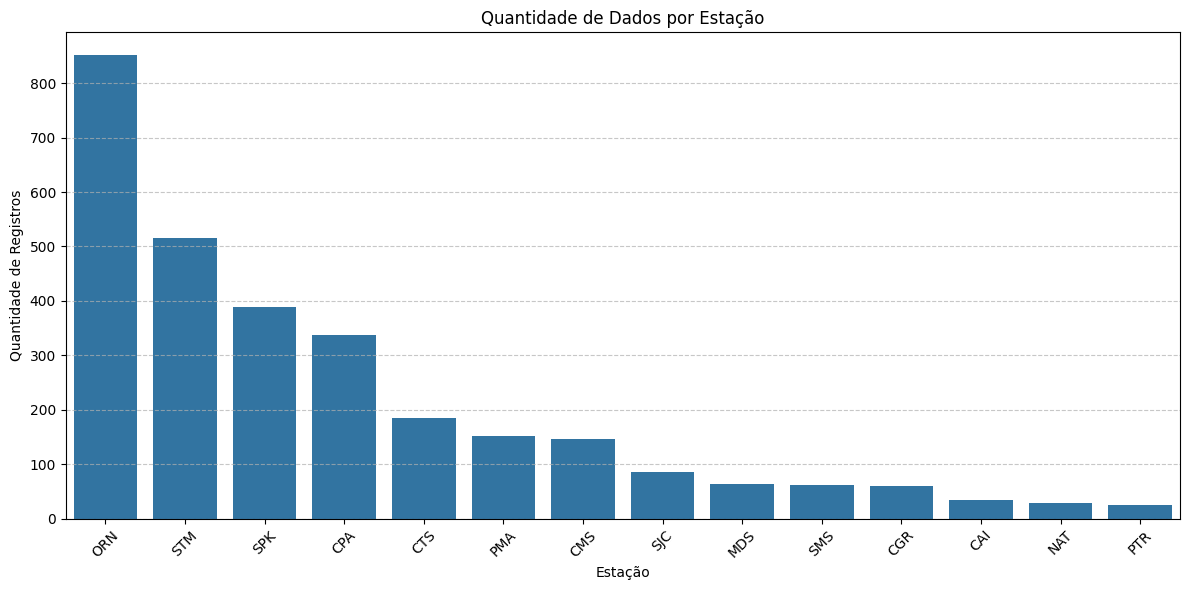

In [15]:
# Agrupando os dados por estação e contando registros
estacao_counts = quarentena_df.groupby('estacao').size().reset_index(name='contagem')

# Ordenando por contagem para melhor visualização
estacao_counts = estacao_counts.sort_values('contagem', ascending=False)

# Criando gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='estacao', y='contagem', data=estacao_counts)

# Adicionando título e rótulos
plt.title('Quantidade de Dados por Estação')
plt.xlabel('Estação')
plt.ylabel('Quantidade de Registros')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [16]:
# Exibindo a tabela com as contagens
print("Número de registros por estação:")
print(estacao_counts)

Número de registros por estação:
   estacao  contagem
7      ORN       851
13     STM       515
12     SPK       388
3      CPA       338
4      CTS       185
8      PMA       151
2      CMS       147
10     SJC        86
5      MDS        64
11     SMS        61
1      CGR        60
0      CAI        35
6      NAT        29
9      PTR        25


In [33]:
# Faz uma contagem dos problemas encontrados usando string matching
from collections import Counter

# Definindo os tipos de problemas a serem contados
tipos = ['número de linhas menor que o esperado','número de linhas maior que o esperado','último timestamp não é o esperado','intervalo temporal fora do esperado']

def contar_problemas(df, tipos):
    contagem = Counter()
    
    # Para cada tipo de problema, procura por strings que contenham essa substring
    for tipo in tipos:
        # Conta quantas linhas contêm este tipo de problema
        count = df['problema'].str.contains(tipo, na=False).sum()
        contagem[tipo] = count
    
    return contagem

# Contando os problemas encontrados
problemas_contados = contar_problemas(quarentena_df, tipos)

# Exibindo os resultados
print("Contagem de problemas encontrados:")
for problema, contagem in problemas_contados.items():
    print(f"{problema}: {contagem}")

Contagem de problemas encontrados:
número de linhas menor que o esperado: 65
número de linhas maior que o esperado: 0
último timestamp não é o esperado: 2864
intervalo temporal fora do esperado: 6


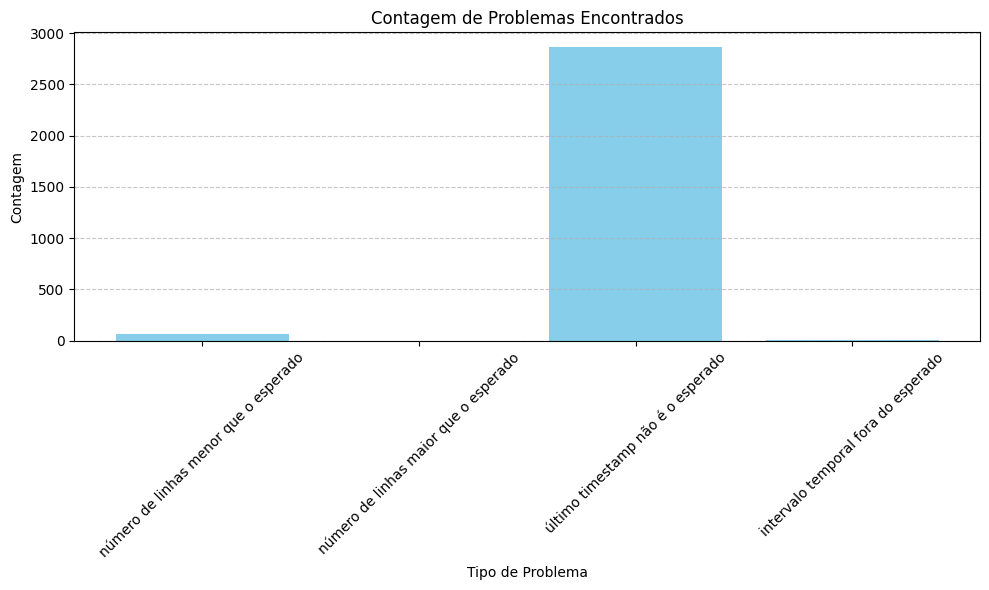

In [35]:
# Crie um plot de barras para visualizar a contagem de problemas
plt.figure(figsize=(10, 6))
plt.bar(problemas_contados.keys(), problemas_contados.values(), color='skyblue')
plt.title('Contagem de Problemas Encontrados')
plt.xlabel('Tipo de Problema')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
import pandas as pd

# Lê o arquivo CSV quarentena.csv
quarentena_df = pd.read_csv('~/sonda-translator/output/sonda-quarentena/quarentena.csv')
quarentena_df

,qid,estacao,tipo,status,code,data_detecao,data_tratamento,problema,path
0,1,STM,SD,Ruim,3,2025-07-16 14:32:19,NaN,"datas diferentes encontradas, esperado: 2024-0...",output/sonda-quarentena/STM/Solarimetricos/STM...
1,2,STM,SD,Ruim,3,2025-07-16 14:32:19,NaN,"datas diferentes encontradas, esperado: 2024-0...",output/sonda-quarentena/STM/Solarimetricos/STM...
2,3,STM,SD,Ruim,3,2025-07-16 14:32:19,NaN,"datas diferentes encontradas, esperado: 2024-1...",output/sonda-quarentena/STM/Solarimetricos/STM...
3,4,STM,SD,Ruim,3,2025-07-16 14:32:19,NaN,"datas diferentes encontradas, esperado: 2024-1...",output/sonda-quarentena/STM/Solarimetricos/STM...
4,5,STM,SD,Ruim,3,2025-07-16 14:32:19,NaN,"datas diferentes encontradas, esperado: 2024-1...",output/sonda-quarentena/STM/Solarimetricos/STM...
...,...,...,...,...,...,...,...,...,...
1527,1511,CAI,SD,Ruim,3,2025-07-16 17:33:49,NaN,"datas diferentes encontradas, esperado: 2020-1...",output/sonda-quarentena/CAI/Solarimetricos/CAI...
1528,1512,CAI,SD,Ruim,3,2025-07-16 17:33:49,NaN,"datas diferentes encontradas, esperado: 2020-1...",output/sonda-quarentena/CAI/Solarimetricos/CAI...
1529,1513,CAI,SD,Ruim,5,2025-07-16 17:33:49,NaN,intervalo total de timestamps é menor que 12 h...,output/sonda-quarentena/CAI/Solarimetricos/CAI...
1530,1514,CAI,SD,Ruim,5,2025-07-16 17:34:40,NaN,intervalo total de timestamps é menor que 12 h...,output/sonda-quarentena/CAI/Solarimetricos/CAI...


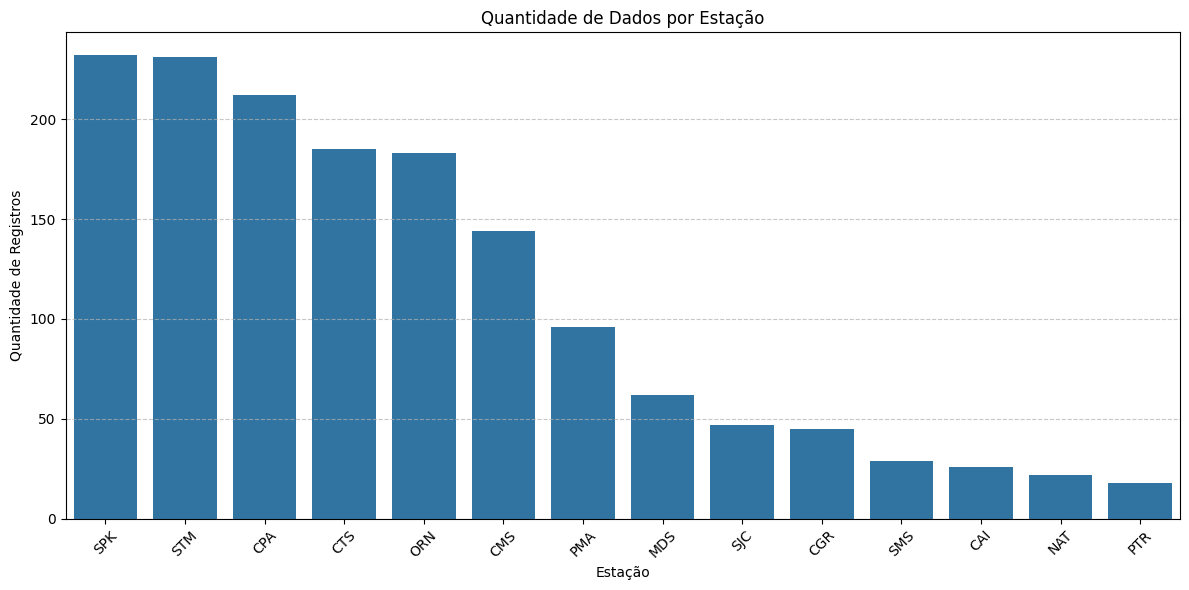

In [23]:
# Agrupando os dados por estação e contando registros
estacao_counts = quarentena_df.groupby('estacao').size().reset_index(name='contagem')

# Ordenando por contagem para melhor visualização
estacao_counts = estacao_counts.sort_values('contagem', ascending=False)

# Criando gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='estacao', y='contagem', data=estacao_counts)

# Adicionando título e rótulos
plt.title('Quantidade de Dados por Estação')
plt.xlabel('Estação')
plt.ylabel('Quantidade de Registros')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [24]:
# Exibindo a tabela com as contagens
print("Número de registros por estação:")
print(estacao_counts)

Número de registros por estação:
   estacao  contagem
12     SPK       232
13     STM       231
3      CPA       212
4      CTS       185
7      ORN       183
2      CMS       144
8      PMA        96
5      MDS        62
10     SJC        47
1      CGR        45
11     SMS        29
0      CAI        26
6      NAT        22
9      PTR        18


In [28]:
quarentena_df

,qid,estacao,tipo,status,code,data_detecao,data_tratamento,problema,path
0,1,STM,SD,Ruim,3,2025-07-16 14:32:19,NaN,"datas diferentes encontradas, esperado: 2024-0...",output/sonda-quarentena/STM/Solarimetricos/STM...
1,2,STM,SD,Ruim,3,2025-07-16 14:32:19,NaN,"datas diferentes encontradas, esperado: 2024-0...",output/sonda-quarentena/STM/Solarimetricos/STM...
2,3,STM,SD,Ruim,3,2025-07-16 14:32:19,NaN,"datas diferentes encontradas, esperado: 2024-1...",output/sonda-quarentena/STM/Solarimetricos/STM...
3,4,STM,SD,Ruim,3,2025-07-16 14:32:19,NaN,"datas diferentes encontradas, esperado: 2024-1...",output/sonda-quarentena/STM/Solarimetricos/STM...
4,5,STM,SD,Ruim,3,2025-07-16 14:32:19,NaN,"datas diferentes encontradas, esperado: 2024-1...",output/sonda-quarentena/STM/Solarimetricos/STM...
...,...,...,...,...,...,...,...,...,...
1527,1511,CAI,SD,Ruim,3,2025-07-16 17:33:49,NaN,"datas diferentes encontradas, esperado: 2020-1...",output/sonda-quarentena/CAI/Solarimetricos/CAI...
1528,1512,CAI,SD,Ruim,3,2025-07-16 17:33:49,NaN,"datas diferentes encontradas, esperado: 2020-1...",output/sonda-quarentena/CAI/Solarimetricos/CAI...
1529,1513,CAI,SD,Ruim,5,2025-07-16 17:33:49,NaN,intervalo total de timestamps é menor que 12 h...,output/sonda-quarentena/CAI/Solarimetricos/CAI...
1530,1514,CAI,SD,Ruim,5,2025-07-16 17:34:40,NaN,intervalo total de timestamps é menor que 12 h...,output/sonda-quarentena/CAI/Solarimetricos/CAI...


In [29]:
# Faz uma contagem dos problemas encontrados usando string matching
from collections import Counter

# Definindo os tipos de problemas a serem contados
tipos = ['datas diferentes encontradas', 'não é possível realizar o teste temporal','mais de 50% dos valores de timestamp são nulos', 'progressão de timestamps não é monotônica crescente', 'intervalo total de timestamps é menor que 12 horas']

def contar_problemas(df, tipos):
    contagem = Counter()
    
    # Para cada tipo de problema, procura por strings que contenham essa substring
    for tipo in tipos:
        # Conta quantas linhas contêm este tipo de problema
        count = df['problema'].str.contains(tipo, na=False).sum()
        contagem[tipo] = count
    
    return contagem

# Contando os problemas encontrados
problemas_contados = contar_problemas(quarentena_df, tipos)

# Exibindo os resultados
print("Contagem de problemas encontrados:")
for problema, contagem in problemas_contados.items():
    print(f"{problema}: {contagem}")

Contagem de problemas encontrados:
datas diferentes encontradas: 1484
não é possível realizar o teste temporal: 0
mais de 50% dos valores de timestamp são nulos: 0
progressão de timestamps não é monotônica crescente: 42
intervalo total de timestamps é menor que 12 horas: 6


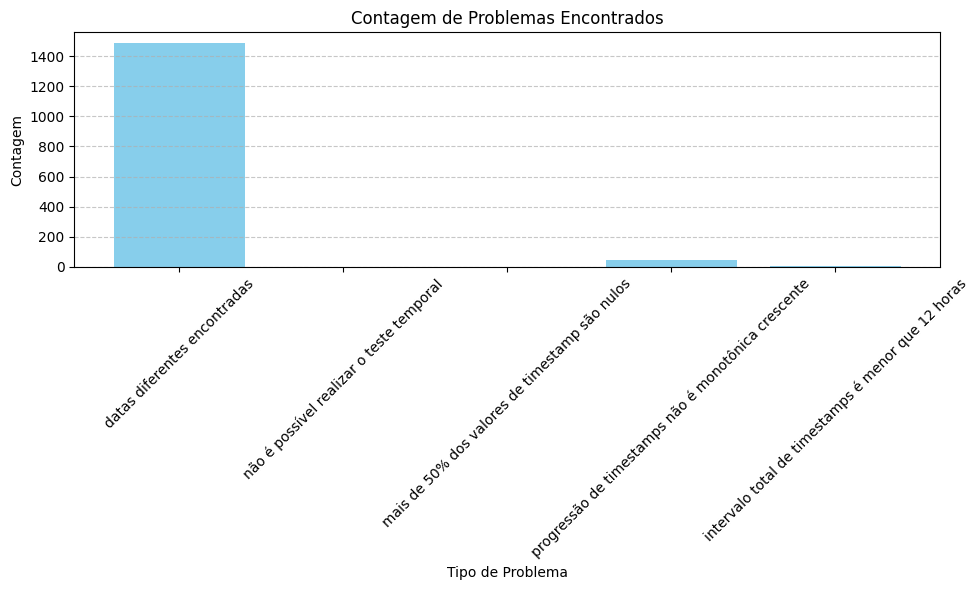

In [30]:
# Crie um plot de barras para visualizar a contagem de problemas
plt.figure(figsize=(10, 6))
plt.bar(problemas_contados.keys(), problemas_contados.values(), color='skyblue')
plt.title('Contagem de Problemas Encontrados')
plt.xlabel('Tipo de Problema')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()